In [578]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [579]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Loading and Exploring

In [580]:
# Importing dataset as "leads"

leads = pd.read_csv("Leads.csv")

In [581]:
# Exploring the dataset

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [582]:
leads.shape

(9240, 37)

In [583]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [584]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Preparation

### Missing Value Treatment

In [585]:
# Checking for percentage of null values in each column

(leads.isna().sum()/leads.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

We can see the value 'select' present in a number of cells where categorical information is required. As this is as good as null value, we will replace it will null value

In [586]:
# Replacing select with NaN

leads.replace("Select", np.nan, inplace = True)

In [587]:
# Checking missing values percentage again

(leads.isna().sum()/leads.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [588]:
# Dropping the columns with more than 35% null values

for i in leads.columns:
    if (leads[i].isna().sum()/leads.shape[0])*100 > 35:
        leads.drop(i, axis = 1, inplace = True)

In [589]:
# Checking remaining missing values

(leads.isna().sum()/leads.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [590]:
# Dropping rows for those columns where less than 2% data is missing

for i in leads.columns:
    if (leads[i].isna().sum()/leads.shape[0])*100 < 2:
        leads = leads[~leads[i].isna()]

In [591]:
# Checking remaining missing values

(leads.isna().sum()/leads.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                          25.303064
What is your current occupation                  29.567996
What matters most to you in choosing a course    29.777386
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [592]:
# For remaining columns with missing values, checking the distribution of the data

for i in leads.columns:
    if leads[i].isna().sum() > 0:
        print(i)
        print(leads[i].value_counts(normalize = True)*100)
        print("\n\n")

Country
India                   95.765713
United States            1.017999
United Arab Emirates     0.781942
Singapore                0.354087
Saudi Arabia             0.309826
United Kingdom           0.221304
Australia                0.191797
Qatar                    0.147536
Hong Kong                0.103275
Bahrain                  0.103275
Oman                     0.088522
France                   0.088522
unknown                  0.073768
South Africa             0.059014
Nigeria                  0.059014
Germany                  0.059014
Kuwait                   0.059014
Canada                   0.059014
Sweden                   0.044261
China                    0.029507
Asia/Pacific Region      0.029507
Uganda                   0.029507
Bangladesh               0.029507
Italy                    0.029507
Belgium                  0.029507
Netherlands              0.029507
Ghana                    0.029507
Philippines              0.029507
Russia                   0.014754
Switze

For the Country column, over 95% of the data is India with the other countries making up a very small percentage of this. As this would not add any significant value to the modelling, we can drop this column. 

Similarly for "What matters most to you in choosing a course" one option makes up almost 100% of the data, so this can be dropped as well

For Current Occupation, the distribution is slighly less skewed. For this column we can create 3 buckets - Unemployed, Working Professional and Others

In [593]:
# Dropping Country and What Matters To You columns

leads.drop(["Country", "What matters most to you in choosing a course"], axis = 1, inplace = True)

In [594]:
# Creating the 3 buckets for Current Occupation column

col = ["Student", "Other", "Housewife", "Businessman"]
leads["What is your current occupation"] = leads["What is your current occupation"].apply(lambda x: "Others" if x in col else x)

In [595]:
# Checking new distribution of the column

leads["What is your current occupation"].value_counts(normalize = True)*100

Unemployed              85.682992
Working Professional    10.593021
Others                   3.723987
Name: What is your current occupation, dtype: float64

In [596]:
# Rechecking missing values

(leads.isna().sum()/leads.shape[0])*100

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.000000
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  0.000000
Total Time Spent on Website                  0.000000
Page Views Per Visit                         0.000000
Last Activity                                0.000000
What is your current occupation             29.567996
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations     

Around one third of the data is still missing in the occupation column. It may not be accurate to replace this with the mode (Unemployed) or to classify it as Others. We will create a new bucket called "missing" to account for these rows

In [597]:
leads["What is your current occupation"].fillna("Missing", inplace = True)

In [598]:
# Final look at missing values

(leads.isna().sum()/leads.shape[0])*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

### Further Data Cleanup

In [599]:
pd.set_option('display.max_columns', None) 
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Others,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [600]:
# Dropping lead number

leads.drop("Lead Number", axis = 1, inplace = True)

In [601]:
# Converting all the Yes/No columns to binary numerical

col_list = ["Do Not Email", "Do Not Call", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque", "A free copy of Mastering The Interview"]

for i in col_list:
    leads[i] = leads[i].apply(lambda x: 1 if x == "Yes" else 0)

In [602]:
leads[col_list].describe()

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.0,9074.000000
mean,0.078907,0.000220,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.0,0.318272
std,0.269608,0.014845,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.0,0.465831
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


We can drop the columns where all values are only 0

In [603]:
drop_col = ["Magazine", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"]

leads.drop(drop_col, axis = 1, inplace = True)

In [604]:
leads.describe().columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [605]:
# Checking the data distribution in the numerical columns

for i in leads.describe().columns:
    print(i)
    print(leads[i].value_counts(normalize = True)*100)
    print("\n\n")

Do Not Email
0    92.109323
1     7.890677
Name: Do Not Email, dtype: float64



Do Not Call
0    99.977959
1     0.022041
Name: Do Not Call, dtype: float64



Converted
0    62.144589
1    37.855411
Name: Converted, dtype: float64



TotalVisits
0.0      23.815296
2.0      18.503416
3.0      14.392771
4.0      12.342958
5.0       8.629050
6.0       5.135552
1.0       4.353097
7.0       3.405334
8.0       2.468592
9.0       1.807362
10.0      1.256337
11.0      0.947763
13.0      0.528984
12.0      0.495922
14.0      0.396738
16.0      0.231430
15.0      0.198369
17.0      0.176328
18.0      0.165307
20.0      0.132246
19.0      0.099184
21.0      0.066123
23.0      0.066123
24.0      0.055102
25.0      0.055102
27.0      0.055102
22.0      0.033061
29.0      0.022041
28.0      0.022041
26.0      0.022041
141.0     0.011020
55.0      0.011020
30.0      0.011020
43.0      0.011020
74.0      0.011020
41.0      0.011020
54.0      0.011020
115.0     0.011020
251.0     0.011020
32.0      0.

We can drop the binary columns where over 90% of the data is No, as this can skew the data

In [606]:
# Dropping said columns

drop_col_2 = ["Do Not Email", "Do Not Call", "Search", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations"]

leads.drop(drop_col_2, axis = 1, inplace = True)

In [607]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Others,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


In [608]:
# Checking the data distribution for remaining categorical variables to see if bucketing is possible

cat_col = ["Lead Origin", "Lead Source", "Last Activity", "Last Notable Activity"]

for i in cat_col:
    print(i)
    print(leads[i].value_counts(normalize = True)*100)
    print("\n\n")

Lead Origin
Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: Lead Origin, dtype: float64



Lead Source
Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Press_Release         0.022041
Social Media          0.022041
Live Chat             0.022041
youtubechannel        0.011020
testone               0.011020
Pay per Click Ads     0.011020
welearnblog_Home      0.011020
WeLearn               0.011020
blog                  0.011020
NC_EDM                0.011020
Name: Lead Source, dtype: float64



Last Activity
Email Opened                    37.822350
SMS Sent                        29.931673
Olark

In [609]:
# Dropping Last Activity as it is very similar to Last Notable Activity

leads.drop("Last Activity", axis = 1, inplace = True)

In [610]:
# Creating bucket Others for Lead Source where value counts % is less than 2%

leads_source_cols = ["Google", "Direct Traffic", "Olark Chat", "Organic Search", "Reference"]

leads["Lead Source"] = leads["Lead Source"].apply(lambda x: x if x in leads_source_cols else "Others")

In [611]:
# Creating bucket Others for Last Notable Activity where value counts % is less than 2%

last_activity_cols = ["Modified", "Email Opened", "SMS Sent", "Page Visited on Website", "Olark Chat Conversation"]

leads["Last Notable Activity"] = leads["Last Notable Activity"].apply(lambda x: x if x in last_activity_cols else "Others")

In [612]:
# Rechecking the data distribution after bucketing

cat_col = ["Lead Origin", "Lead Source", "Last Notable Activity"]

for i in cat_col:
    print(i)
    print(leads[i].value_counts(normalize = True)*100)
    print("\n\n")

Lead Origin
Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: Lead Origin, dtype: float64



Lead Source
Google            31.606789
Direct Traffic    28.025127
Olark Chat        19.318933
Organic Search    12.717655
Reference          4.882081
Others             3.449416
Name: Lead Source, dtype: float64



Last Notable Activity
Modified                   36.003967
Email Opened               31.110866
SMS Sent                   23.716112
Others                      3.647785
Page Visited on Website     3.504518
Olark Chat Conversation     2.016751
Name: Last Notable Activity, dtype: float64





In [613]:
# Shorting some column names for better readability

leads.rename({"What is your current occupation" : "Occupation", "A free copy of Mastering The Interview" : "Free Copy"}, axis = 1, inplace = True)

In [614]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Occupation,Free Copy,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Others,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unemployed,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Unemployed,0,Modified


## Data Preparation

### Dummy Variables

In [615]:
# Creating dummy variables for the categorical columns

leads_dummies = pd.get_dummies(leads[["Lead Origin", "Lead Source", "Occupation", "Last Notable Activity"]], drop_first = True)

In [616]:
leads_dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Occupation_Others,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0


In [617]:
# Concatenating the two dataframes and dropping the original columns

leads = pd.concat([leads, leads_dummies], axis = 1)

leads.drop(["Lead Origin", "Lead Source", "Occupation", "Last Notable Activity"], axis = 1, inplace = True)

In [618]:
leads.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Occupation_Others,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0


In [619]:
leads.shape

(9074, 22)

### Train Test Split

In [620]:
# Spliting the dataframe into 70% training set and 30% testing set

df_train, df_test = train_test_split(leads, train_size = 0.7, random_state = 100)

In [621]:
# Verifying the train and test datasets

print(df_train.shape)
print(df_test.shape)

(6351, 22)
(2723, 22)


### Scaling Numerical Variables

Using MinMax scaler, we will scale the 3 numerical columns

In [622]:
# Instantiating

scaler = MinMaxScaler()

In [623]:
# Creating a list of the numeric variables to be scaled

num_var = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]

# Scaling the variables

df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [624]:
# Verifying all values have been scaled

df_train[num_var].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6351.000000,6351.000000,6351.000000
mean,0.013831,0.217585,0.099046
std,0.020602,0.244868,0.087462
min,0.000000,0.000000,0.000000
25%,0.003984,0.004492,0.041667
50%,0.011952,0.110961,0.083333
75%,0.019920,0.413522,0.138750
max,1.000000,1.000000,1.000000


### Checking for Class Imbalance

In [625]:
# Checking the percentage of conversions in the dataset

(sum(df_train['Converted'])/len(df_train['Converted'].index))*100

38.51361990237758

There is a good enough balance in the target variable to allow us to proceed with model building

## Model Building

In [626]:
# Dividing training dataset into X_train and y_train

X_train = df_train.drop(["Prospect ID", "Converted"], axis = 1)
y_train = df_train["Converted"]

In [627]:
X_train.shape

(6351, 20)

In [628]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Occupation_Others,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3009,0.007968,0.178347,0.083333,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1012,0.007968,0.085355,0.083333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
4750,0.007968,0.619946,0.083333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7987,0.019920,0.711590,0.104167,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [629]:
y_train.head()

3009    0
1012    0
9226    0
4750    1
7987    1
Name: Converted, dtype: int64

### Automated feature selection through RFE

In [630]:
# Creating RFE model

logreg = LogisticRegression()

rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)

In [631]:
rfe.support_

array([ True,  True, False, False, False,  True,  True, False,  True,
       False, False, False,  True,  True,  True, False,  True, False,
       False,  True])

In [632]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Free Copy', False, 10),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 8),
 ('Lead Source_Others', False, 3),
 ('Lead Source_Reference', False, 11),
 ('Occupation_Others', True, 1),
 ('Occupation_Unemployed', True, 1),
 ('Occupation_Working Professional', True, 1),
 ('Last Notable Activity_Modified', False, 2),
 ('Last Notable Activity_Olark Chat Conversation', True, 1),
 ('Last Notable Activity_Others', False, 9),
 ('Last Notable Activity_Page Visited on Website', False, 5),
 ('Last Notable Activity_SMS Sent', True, 1)]

Using RFE, we get the following variables for the model:
- Total Visits
- Total Time Spent on Website
- Lead Origin_Lead Add Form
- Lead Origin_Lead Import
- Lead Source_Olark Chat
- Occupation_Others
- Occupation_Unemployed
- Occupation_Working Professional
- Last Notable Activity_Olark Chat Conversation
- Last Notable Activity_SMS Sent

We will create a model starting with these variables, then keep fine tuning as per the model performance

### Iteration 1

In [633]:
# Creating X_train_sm with an added constant column + the columns selected via RFE

X_train_sm = sm.add_constant(X_train[["TotalVisits", "Total Time Spent on Website", "Lead Origin_Lead Add Form", "Lead Origin_Lead Import", "Lead Source_Olark Chat", "Occupation_Others", "Occupation_Unemployed", "Occupation_Working Professional", "Last Notable Activity_Olark Chat Conversation", "Last Notable Activity_SMS Sent"]])

In [634]:
# Creating the logistic regression model

logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2678.8
Date:                Mon, 19 Jun 2023   Deviance:                       5357.6
Time:                        13:22:50   Pearson chi2:                 6.36e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3870
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.6458      0.112    -32.658      0.000      -3.865      -3.427
TotalVisits                                       7.3824      2.237      3.300      0.001       2.997      11.768
Total Time Spent on Website                       4.6697      0.165     28.272      0.000       4.346       4.993
Lead Origin_Lead Add Form                         4.2268      0.213     19.829      0.000       3.809       4.645
Lead Origin_Lead Import                           1.7290      0.459      3.768      0.000       0.830       2.628
Lead Source_Olark Chat                            1.3702      0.109     12.621      0.000       1.157       1.583
Occupation_Others                                 1.4093      0.207      6.813      0.000       1.004       1.815
Occupation_Unemployed                             1.2025      0.088     13.738      0.000       1.031       1.374
Occupation_Working Professional                   3.6739      0.196     18.783      0.000       3.291       4.057
Last Notable Activity_Olark Chat Conversation    -0.8885      0.328     -2.710      0.007      -1.531      -0.246
Last Notable Activity_SMS Sent                    1.5683      0.078     20.013      0.000       1.415       1.722
=================================================================================================================
"""

In [635]:
# Checking VIF scores for collinearity in the variables

vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range (X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
0,const,6.15
5,Lead Source_Olark Chat,1.38
7,Occupation_Unemployed,1.33
2,Total Time Spent on Website,1.32
8,Occupation_Working Professional,1.31
3,Lead Origin_Lead Add Form,1.24
1,TotalVisits,1.15
10,Last Notable Activity_SMS Sent,1.09
6,Occupation_Others,1.07
9,Last Notable Activity_Olark Chat Conversation,1.04


We have all p-values below 0.05 and VIF scores below 2, as preferred so we shall go ahead with this model for evaluation

## Model Evaluation

In [636]:
# Getting predicted conversion probability values

res = logm1.fit()

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.059854
1012    0.619056
9226    0.254831
4750    0.706050
7987    0.736278
1281    0.786991
2880    0.027946
4971    0.925789
7536    0.864507
1248    0.680478
dtype: float64

In [637]:
# Viewing actual conversions vs predicted probability side-by-side

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_prob,ID
3009,0,0.059854,3009
1012,0,0.619056,1012
9226,0,0.254831,9226
4750,1,0.706050,4750
7987,1,0.736278,7987


### Cutoff Point

In [638]:
# Getting binary values for conversion at different cutoff probabilities

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_prob,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.059854,3009,1,0,0,0,0,0,0,0,0,0
1012,0,0.619056,1012,1,1,1,1,1,1,1,0,0,0
9226,0,0.254831,9226,1,1,1,0,0,0,0,0,0,0
4750,1,0.706050,4750,1,1,1,1,1,1,1,1,0,0
7987,1,0.736278,7987,1,1,1,1,1,1,1,1,0,0


In [639]:
# Checking the model metrics at different cut-offs to determine the best cut-off point

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.385136     1.000000     0.000000
0.1   0.1  0.616753     0.975879     0.391805
0.2   0.2  0.753740     0.917007     0.651472
0.3   0.3  0.795780     0.833606     0.772087
0.4   0.4  0.803181     0.757155     0.832010
0.5   0.5  0.806330     0.686427     0.881434
0.6   0.6  0.802078     0.619787     0.916261
0.7   0.7  0.777988     0.507359     0.947503
0.8   0.8  0.760038     0.427228     0.968502
0.9   0.9  0.704613     0.253884     0.986940


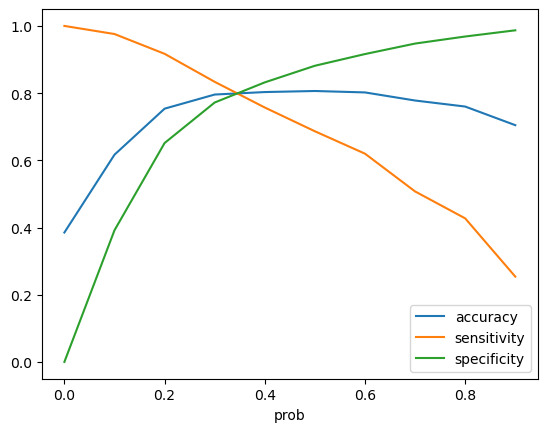

In [640]:
# Plotting the different metrics to determine optimum cutoff point

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

Using this, we can estimate the optimum cutoff rate for our model at 0.30. 

In [641]:
# Adding predictions as per the cutoff value of 0.3

y_train_pred_final['predicted'] = y_train_pred_final.Convert_prob.map(lambda x: 1 if x > 0.30 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], axis = 1, inplace = True)
y_train_pred_final.head()

,Converted,Convert_prob,ID,predicted
3009,0,0.059854,3009,0
1012,0,0.619056,1012,1
9226,0,0.254831,9226,0
4750,1,0.706050,4750,1
7987,1,0.736278,7987,1


In [642]:
# Checking the accuracy with this cutoff point

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7957801920957329


In [643]:
# Creating confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Calculating sensitivity

TP / float(TP+FN)

0.8336058871627147

With a cutoff point of 0.35, while the accuracy is 79%, we are able to get a sensitivity over 80%. This means that out of all the converted leads, 83% can be identified using the model. This is in accordance with the CEO's requirements as well.

Hence, considering the model sensitivity along with the coefficients' p-value and VIF scores, we can conclude that we have created a satisfactory model in the first iteration itself.

We have focussed only on **sensitivity** as an evaluation metric as the goal of the model is to correctly identify converted leads, i.e. true positives

We shall further gauge the model quality using ROC curve

### ROC Curve

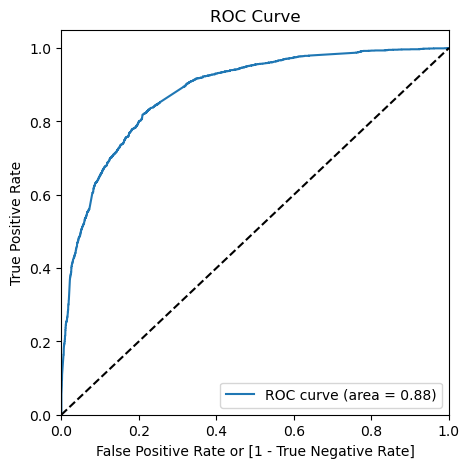

In [498]:
# Plotting ROC curve to see if we have maximised area under the curve with our cutoff value

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_prob)

We have an area of 0.88 under the curve which indicates a good model

### Assigning Lead Score

In [649]:
# Assigning a score to each lead to gauge if hot or cold

y_train_pred_final["Lead Score"] = round(y_train_pred_final["Convert_prob"]*100,2)

In [652]:
# Rearranging the columns

y_train_pred_final = y_train_pred_final[["ID", "Converted", "Convert_prob", "Lead Score", "predicted"]]

In [657]:
# Obtaining the prospect IDs from the main leads dataframe

leads_train = pd.DataFrame()
leads_train["Prospect ID"] = leads["Prospect ID"]
leads_train["ID"] = leads.index

leads_train.head()

,Prospect ID,ID
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0
1,2a272436-5132-4136-86fa-dcc88c88f482,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,2
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,3
4,3256f628-e534-4826-9d63-4a8b88782852,4


In [662]:
# Creating a final dataframe showing the prospect ID with the lead score and conversion prediction

leads_score_train = pd.merge(leads_train, y_train_pred_final, how = "inner", on = "ID")
leads_score_train.head()

,Prospect ID,ID,Converted,Convert_prob,Lead Score,predicted
0,2a272436-5132-4136-86fa-dcc88c88f482,1,0,0.292705,29.27,0
1,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,2,1,0.738106,73.81,1
2,3256f628-e534-4826-9d63-4a8b88782852,4,1,0.648219,64.82,1
3,2058ef08-2858-443e-a01f-a9237db2f5ce,5,0,0.093171,9.32,0
4,9fae7df4-169d-489b-afe4-0f3d752542ed,6,1,0.741916,74.19,1


In [661]:
# Dropping ID column

leads_score_train.drop("ID", axis = 1, inplace = True)
leads_score_train.head()

,Prospect ID,Converted,Convert_prob,Lead Score,predicted
0,2a272436-5132-4136-86fa-dcc88c88f482,0,0.292705,29.27,0
1,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,0.738106,73.81,1
2,3256f628-e534-4826-9d63-4a8b88782852,1,0.648219,64.82,1
3,2058ef08-2858-443e-a01f-a9237db2f5ce,0,0.093171,9.32,0
4,9fae7df4-169d-489b-afe4-0f3d752542ed,1,0.741916,74.19,1


## Making Predictions on Test Data

In [499]:
# Creating X_test and y_test from df_test

X_test = df_test.drop(["Prospect ID", "Converted"], axis = 1)
y_test = df_test["Converted"]

In [500]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Occupation_Others,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3271,4.0,157,4.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1490,5.0,1513,5.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7936,2.0,74,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4216,0.0,0,0.0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0
3830,8.0,164,8.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [501]:
# Scaling the numerical variables in X_test

num_var = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]

# Scaling the variables

X_test[num_var] = scaler.transform(X_test[num_var])

In [502]:
print(X_test.shape)
print(y_test.shape)

(2723, 20)
(2723,)


In [505]:
# Making the prediction on X_test

X_test_sm = sm.add_constant(X_test[["TotalVisits", "Total Time Spent on Website", "Lead Origin_Lead Add Form", "Lead Origin_Lead Import", "Lead Source_Olark Chat", "Occupation_Others", "Occupation_Unemployed", "Occupation_Working Professional", "Last Notable Activity_Olark Chat Conversation", "Last Notable Activity_SMS Sent"]])
y_test_pred = res.predict(X_test_sm)


In [506]:
y_test_pred.head()

3271    0.039212
1490    0.966078
7936    0.031319
4216    0.879773
3830    0.044513
dtype: float64

In [509]:
# Converting both y_test and y_test_pred to dataframes and viewing the actual conversions and predicted probability side by side

y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['ID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_prob'})
y_pred_final.head()

,Converted,ID,Convert_prob
0,0,3271,0.039212
1,1,1490,0.966078
2,0,7936,0.031319
3,1,4216,0.879773
4,0,3830,0.044513


In [511]:
# Rearranging the columns for better readability

y_pred_final = y_pred_final[['ID','Converted','Convert_prob']]
y_pred_final.head()

,ID,Converted,Convert_prob
0,3271,0,0.039212
1,1490,1,0.966078
2,7936,0,0.031319
3,4216,1,0.879773
4,3830,0,0.044513


In [644]:
# Adding predictions using out cutoff value of 0.3

y_pred_final['predicted'] = y_pred_final.Convert_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,ID,Converted,Convert_prob,predicted
0,3271,0,0.039212,0
1,1490,1,0.966078,1
2,7936,0,0.031319,0
3,4216,1,0.879773,1
4,3830,0,0.044513,0


In [646]:
# Checking accuracy of the predictions

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.791039294895336

In [648]:
# Creating confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted )

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Calculating sensitivity

TP / float(TP+FN)

0.8200202224469161

Even within the test data, we are able to acheive an **accuracy of 79% and sensitivity of 82%**, which are very similar to the values obtained with training set. Thus the model is able to generalise sufficiently and provide the necessary predictions to identify hot leads and increase conversion rate to over 80%

We can now create the final result dataframe with the lead score assigned to each prospect

In [663]:
# Obtaining the prospect IDs from the main leads dataframe

leads_test = pd.DataFrame()
leads_test["Prospect ID"] = leads["Prospect ID"]
leads_test["ID"] = leads.index

leads_test.head()

,Prospect ID,ID
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0
1,2a272436-5132-4136-86fa-dcc88c88f482,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,2
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,3
4,3256f628-e534-4826-9d63-4a8b88782852,4


In [667]:
# Creating the final dataframe showing the prospect ID with the lead score and conversion prediction

leads_score_test = pd.merge(leads_test, y_pred_final, how = "inner", on = "ID")
leads_score_test["Lead Score"] = round(leads_score_test["Convert_prob"]*100,2)
leads_score_test.drop("ID", axis = 1, inplace = True)
leads_score_test = leads_score_test[["Prospect ID", "Converted", "Convert_prob", "Lead Score", "predicted"]]
leads_score_test.head()

,Prospect ID,Converted,Convert_prob,Lead Score,predicted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.254831,25.48,0
1,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0.145043,14.50,0
2,2a369e35-ca95-4ca9-9e4f-9d27175aa320,1,0.651618,65.16,1
3,8bf76a52-2478-476b-8618-1688e07874ad,1,0.751510,75.15,1
4,88867067-3750-4753-8d33-1c7d1db53b5e,0,0.125695,12.57,0
